In [1]:
from EDA_preprocessing import preprocess_data
from sklearn.metrics import f1_score, classification_report

corrected = "./data/corrected"
kddcup_data = "./data/kddcup.data"

kddcup_data_10_percent_corrected = "./data/kddcup.data_10_percent_corrected"
kddcup_newtestdata_10_percent_unlabeled = "./data/kddcup.newtestdata_10_percent_unlabeled"

kddcup_testdata_unlabeled = "./data/kddcup.testdata.unlabeled"
kddcup_testdata_unlabeled_10_percent = "./data/kddcup.testdata.unlabeled_10_percent"

correspondence = "./data/training_attack_types.txt"

In [2]:
X_train, y_train, X_test, y_test = preprocess_data(kddcup_data,
                                                   kddcup_testdata_unlabeled_10_percent,
                                                   "./data/headers",
                                                   "./data/training_attack_types.txt")

/home/kopoden/anaconda2/envs/py3dm/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [3]:
X_train_matrix = X_test.as_matrix()
X_test_matrix = X_train.as_matrix()

In [6]:
y_train_vector = y_test.as_matrix()
y_test_vector = y_train.as_matrix()

# Model 1

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras import losses

batch_size = 5000
epochs = 25
learning_rate = 0.001

model1 = Sequential()
model1.add(Dense(64, input_shape=(1, X_train_matrix.shape[1])))
model1.add(Dense(128))
model1.add(Dropout(0.7))
model1.add(Dense(5, activation='softmax'))

Using TensorFlow backend.


In [8]:
y_train_1 = (np.arange(5) == y_train_vector[:,None]).astype(np.int).reshape(-1, 1, 5)
y_test_1 = (np.arange(5) == y_test_vector[:,None]).astype(np.int).reshape(-1, 1, 5)

In [9]:
from custom_metrics import f1

adam = optimizers.Adam(lr=learning_rate)
sgd  = optimizers.SGD(lr=learning_rate)
model1.compile(loss=losses.mean_squared_error,
               optimizer=adam,
               metrics=['accuracy', f1])

In [10]:
history = model1.fit(np.reshape(X_train_matrix, (-1, 1, 37)), y_train_1, batch_size=batch_size,
                    validation_data=(np.reshape(X_test_matrix, (-1, 1, 37)), y_test_1), epochs=epochs)#, verbose=False)

Train on 247247 samples, validate on 827736 samples
Epoch 1/25
247247/247247 [==============================] - 5s - loss: 0.0320 - acc: 0.9097 - f1: 0.8542 - val_loss: 0.0069 - val_acc: 0.9813 - val_f1: 0.9813
Epoch 2/25
247247/247247 [==============================] - 3s - loss: 0.0071 - acc: 0.9818 - f1: 0.9818 - val_loss: 0.0063 - val_acc: 0.9826 - val_f1: 0.9826
Epoch 3/25
247247/247247 [==============================] - 3s - loss: 0.0064 - acc: 0.9829 - f1: 0.9831 - val_loss: 0.0060 - val_acc: 0.9836 - val_f1: 0.9837
Epoch 4/25
247247/247247 [==============================] - 3s - loss: 0.0060 - acc: 0.9835 - f1: 0.9838 - val_loss: 0.0054 - val_acc: 0.9837 - val_f1: 0.9843
Epoch 5/25
247247/247247 [==============================] - 3s - loss: 0.0051 - acc: 0.9863 - f1: 0.9865 - val_loss: 0.0042 - val_acc: 0.9884 - val_f1: 0.9884
Epoch 6/25
247247/247247 [==============================] - 3s - loss: 0.0043 - acc: 0.9891 - f1: 0.9890 - val_loss: 0.0040 - val_acc: 0.9896 - val_f1: 0

In [11]:
y_pred = model1.predict(X_test_matrix.reshape(-1, 1, 37), batch_size=batch_size)
target_names = ['normal','prop','dos','u2r','r2l']
y_pred = np.argmax(y_pred, axis=2)
print(classification_report(y_test_vector, y_pred, target_names=target_names, digits=4))

             precision    recall  f1-score   support

     normal     0.9940    0.9991    0.9966    625708
       prop     0.9484    0.8002    0.8680     10619
        dos     0.9980    0.9943    0.9962    190582
        u2r     0.0000    0.0000    0.0000        42
        r2l     0.0000    0.0000    0.0000       785

avg / total     0.9934    0.9945    0.9938    827736



/home/kopoden/anaconda2/envs/py3dm/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/kopoden/anaconda2/envs/py3dm/lib/python3.6/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/kopoden/anaconda2/envs/py3dm/lib/python3.6/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


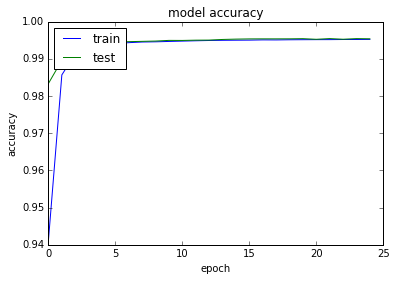

In [51]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

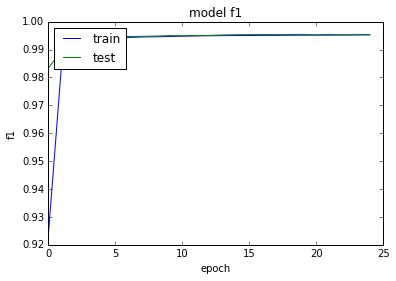

In [52]:
import matplotlib.pyplot as plt
# summarize history for f1
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

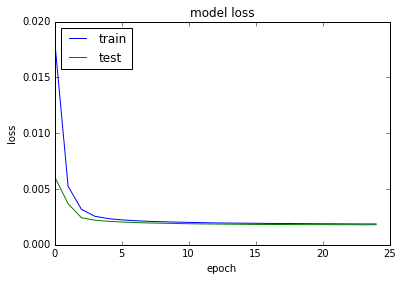

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 2. Cat boost

In [14]:
import numpy as np
from catboost import CatBoostClassifier, CatboostIpythonWidget
# specify the training parameters 
model = CatBoostClassifier(iterations=50, depth=10, learning_rate=1,
                           loss_function='MultiClass', calc_feature_importance=True)
#train the model
#model.fit(X_train_matrix, y_train_vector, cat_features=[], verbose=True)
model.fit(X_train_matrix, y_train_vector, eval_set=(X_test_matrix, y_test_vector))
# make the prediction using the resulting model
preds_class = model.predict(X_test_matrix)
preds_proba = model.predict_proba(X_test_matrix)

In [15]:
target_names = ['normal','prop','dos','u2r','r2l']
print(classification_report(y_test_vector, preds_class, target_names=target_names, digits=4))

             precision    recall  f1-score   support

     normal     0.9992    0.9997    0.9994    625708
       prop     0.9854    0.9942    0.9898     10619
        dos     0.9998    0.9997    0.9998    190582
        u2r     0.8889    0.1905    0.3137        42
        r2l     0.9506    0.5146    0.6678       785

avg / total     0.9991    0.9991    0.9990    827736



In [26]:
import importlib
importlib.reload(scorer)

<module 'scorer' from '/home/kopoden/Desktop/network_malware_detection/scorer.py'>

In [27]:
import scorer
print(scorer.classification_report(y_test_vector, preds_class, target_names=target_names, digits=4))

NameError: name 'precision_recall_fscore_support' is not defined